In [31]:
%matplotlib inline
import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import wbdata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('wb_data.csv', sep='\t')
print df.head()

  iso_code     country        date    gdp   gini
0       1A  Arab World  2016-01-01  16716  28.96
1       1A  Arab World  2015-01-01  16281  28.96
2       1A  Arab World  2014-01-01  15911  28.96
3       1A  Arab World  2013-01-01  15526  28.96
4       1A  Arab World  2012-01-01  15090  28.96


In [33]:
gdp_gini_subset = df[['iso_code','country','date','gdp', 'gini']]
print gdp_gini_subset.describe()

                 gdp         gini
count    4488.000000  4477.000000
mean    15850.737299    37.643672
std     17948.431646     9.145874
min       408.000000    16.230000
25%      3249.000000    28.960000
50%      9331.000000    35.390000
75%     22999.500000    42.970000
max    140037.000000    64.790000


In [34]:
gdp_bins  = [407, 3249,  22999.5, 140037]
gini_bins = [16, 28.96, 42.97,   100]
group_names = ['Low', 'Average', 'Hight']

In [56]:
gdp_gini_subset['gdp_categories'] = pd.cut(gdp_gini_subset['gdp'], gdp_bins, labels=group_names)
gdp_gini_subset['gini_categories'] = pd.cut(gdp_gini_subset['gini'], gini_bins, labels=group_names)
print gdp_gini_subset.tail()

     iso_code   country        date   gdp  gini gdp_categories gini_categories
4483       ZW  Zimbabwe  2004-01-01  1532   NaN            Low             NaN
4484       ZW  Zimbabwe  2003-01-01  1601   NaN            Low             NaN
4485       ZW  Zimbabwe  2002-01-01  1911   NaN            Low             NaN
4486       ZW  Zimbabwe  2001-01-01  2089   NaN            Low             NaN
4487       ZW  Zimbabwe  2000-01-01  2037   NaN            Low             NaN


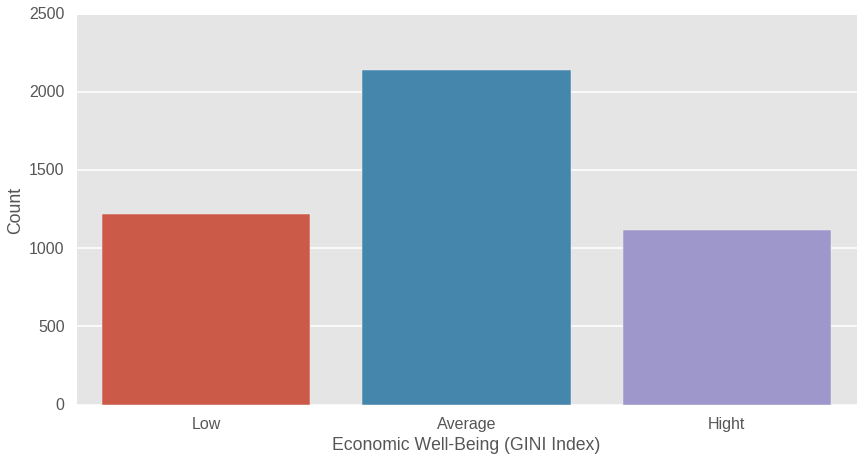

In [94]:

sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=gdp_gini_subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

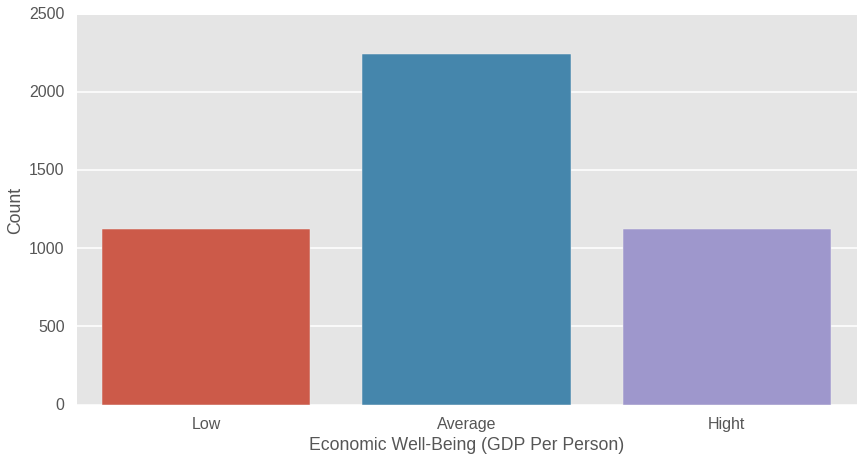

In [95]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=gdp_gini_subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

In [96]:
#print gdp_gini_subset.head()

pisa2012_file='PISA_2012_clean.csv'
pisa12 = pd.read_csv(pisa2012_file)

pisa2015_file='PISA_2015_clean.csv'
pisa15 = pd.read_csv(pisa2015_file)

pisa2008_file='PISA_2008_clean.csv'
pisa08 = pd.read_csv(pisa2008_file)

countries = wbdata.get_country(display=False)
d = dict((x['name'].strip(), x['iso2Code']) for x in countries)

pisa12 = pisa12.assign(iso_code = pisa12.country.map(lambda x: d[x]))
pisa15 = pisa15.assign(iso_code = pisa15.country.map(lambda x: d[x]))
pisa08 = pisa08.assign(iso_code = pisa08.country.map(lambda x: d[x]))

df_pisa_all = pd.concat([pisa08, pisa12, pisa15])
df_pisa_all.sort(['country','iso_code'], inplace=True)

df4 = pd.merge(gdp_gini_subset, df_pisa_all, how='right', on=['iso_code','country','date'])

print df4.head()
print df4.tail()

  iso_code    country        date    gdp   gini gdp_categories  \
0       AL    Albania  2015-01-01  11504  28.96        Average   
1       AL    Albania  2012-01-01  10526  28.96        Average   
2       AL    Albania  2009-01-01   8823  29.98        Average   
3       DZ    Algeria  2015-01-01  14612  42.72        Average   
4       AR  Argentina  2015-01-01  20337  42.67        Average   

  gini_categories  Reading  Math  
0             Low      405   413  
1             Low      394   394  
2         Average      385   377  
3         Average      350   360  
4         Average      475   456  
    iso_code  country        date    gdp   gini gdp_categories  \
191       UY  Uruguay  2015-01-01  21115  41.60        Average   
192       UY  Uruguay  2012-01-01  18817  41.32        Average   
193       UY  Uruguay  2009-01-01  15391  46.28        Average   
194       VN  Vietnam  2015-01-01   6034  37.59        Average   
195       VN  Vietnam  2012-01-01   5000  38.70        Average 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


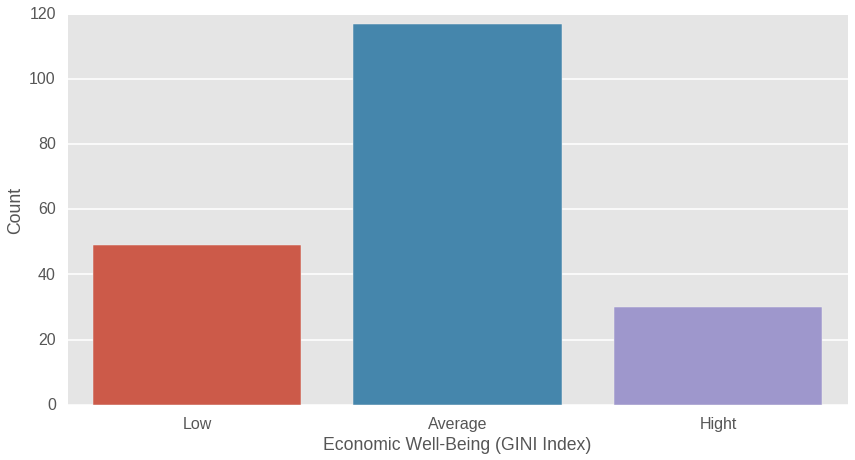

In [97]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=df4)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

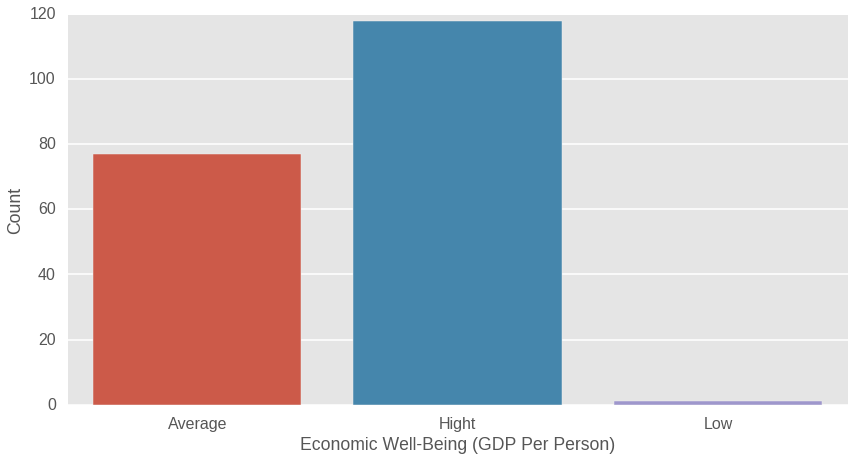

In [98]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=df4)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

# H0 - hypitize that Gini index is not correlated with results in PISA test in Math

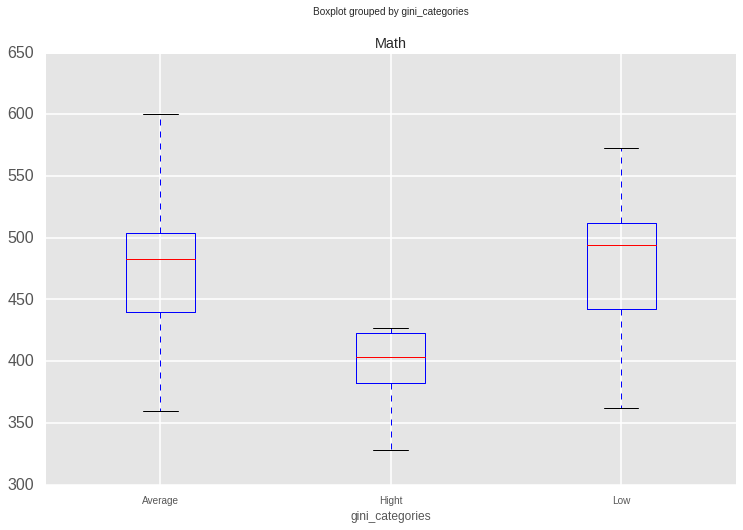

In [99]:
#pd.options.display.mpl_style = 'default'
import matplotlib
matplotlib.style.use('ggplot')
df4.boxplot('Math', by='gini_categories', figsize=(12,8))

In [100]:
groups = df4.groupby("gini_categories").groups
#print groups
#exit(0)
low_gini = df4.loc[df4['gini_categories'] == 'Low'].Math
shapiro_results = scipy.stats.shapiro(low_gini)
#shapiro_results = scipy.stats.shapiro(groups["Low"])
print "*** Low GINI check normal***"
print shapiro_results

#print low_gini
av_gini =  df4.loc[df4['gini_categories'] == 'Average'].Math
shapiro_results = scipy.stats.shapiro(av_gini)
print "*** AVERAGE GINI check normal ***"
print shapiro_results


hi_gini =  df4.loc[df4['gini_categories'] == 'Hight'].Math
shapiro_results = scipy.stats.shapiro(hi_gini)
print "*** HIGHT GINI check normal ***"
print shapiro_results

mod = ols('Math ~ gini_categories', data=df4).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm



*** Low GINI check normal***
(0.9094054698944092, 0.0011308548273518682)
*** AVERAGE GINI check normal ***
(0.9733206033706665, 0.019619692116975784)
*** HIGHT GINI check normal ***
(0.8602246046066284, 0.0010228214086964726)
                        sum_sq   df          F        PR(>F)
gini_categories   82929.669048    2  14.903332  9.576599e-07
Residual         536974.754422  193        NaN           NaN
0.133778153386


# H0 - hypitize that Gini index is not correlated with results in PISA test in Reading

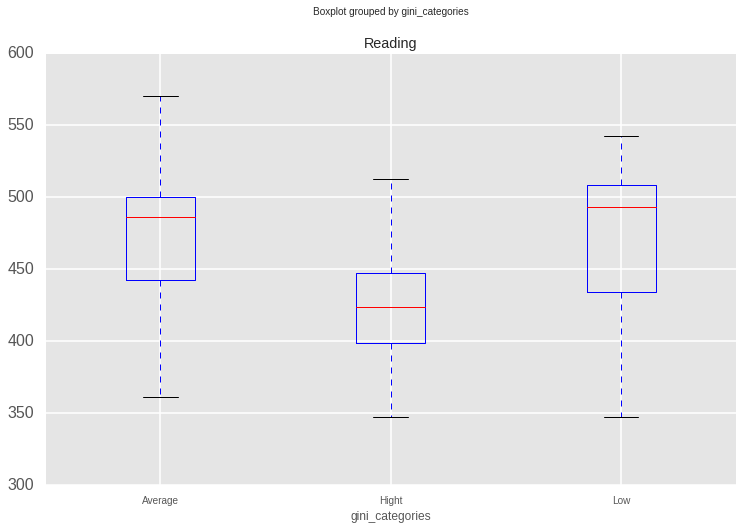

In [101]:
df4.boxplot('Reading', by='gini_categories', figsize=(12,8))

In [102]:
groups = df4.groupby("gini_categories").groups
#print groups
#exit(0)
low_gini = df4.loc[df4['gini_categories'] == 'Low'].Reading
shapiro_results = scipy.stats.shapiro(low_gini)
#shapiro_results = scipy.stats.shapiro(groups["Low"])
print "*** Low GINI check normal***"
print shapiro_results

#print low_gini
av_gini =  df4.loc[df4['gini_categories'] == 'Average'].Reading
shapiro_results = scipy.stats.shapiro(av_gini)
print "*** AVERAGE GINI check normal ***"
print shapiro_results


hi_gini =  df4.loc[df4['gini_categories'] == 'Hight'].Reading
shapiro_results = scipy.stats.shapiro(hi_gini)
print "*** HIGHT GINI check normal ***"
print shapiro_results

mod = ols('Reading ~ gini_categories', data=df4).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

*** Low GINI check normal***
(0.8943895101547241, 0.0003621618670877069)
*** AVERAGE GINI check normal ***
(0.9355471730232239, 2.7287918783258647e-05)
*** HIGHT GINI check normal ***
(0.932308554649353, 0.05656588822603226)
                        sum_sq   df          F    PR(>F)
gini_categories   53894.085889    2  11.845928  0.000014
Residual         439035.179417  193        NaN       NaN
0.109334319713


In [113]:
df6 = gdp_gini_subset.assign(gini_gdp_categories=gdp_gini_subset['gini_categories']+'_'+gdp_gini_subset['gdp_categories'])
print df6.tail()

TypeError: Categorical cannot perform the operation +

# H0 - hypitize that Gini-GDP index is not correlated with results in PISA test in Math

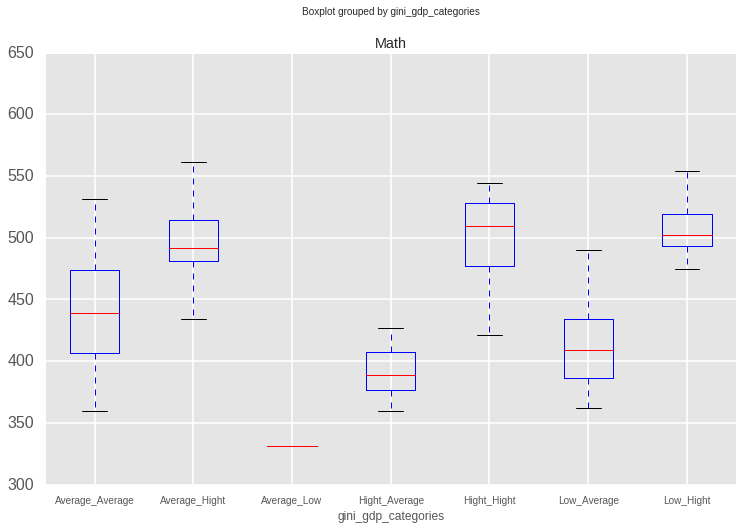

In [103]:
df4 = df4.assign(gini_gdp_categories=df4['gini_categories']+'_'+df4['gdp_categories'])
df4.boxplot('Math', by='gini_gdp_categories', figsize=(12,8))

In [109]:
print df4.loc[df4['gini_gdp_categories']=='Average_Low']
df5 = df4[df4.gini_gdp_categories != 'Average_Low']

   iso_code          country        date   gdp   gini gdp_categories  \
98       KG  Kyrgyz Republic  2009-01-01  2746  29.87            Low   

   gini_categories  Reading  Math gini_gdp_categories  
98         Average      314   331         Average_Low  


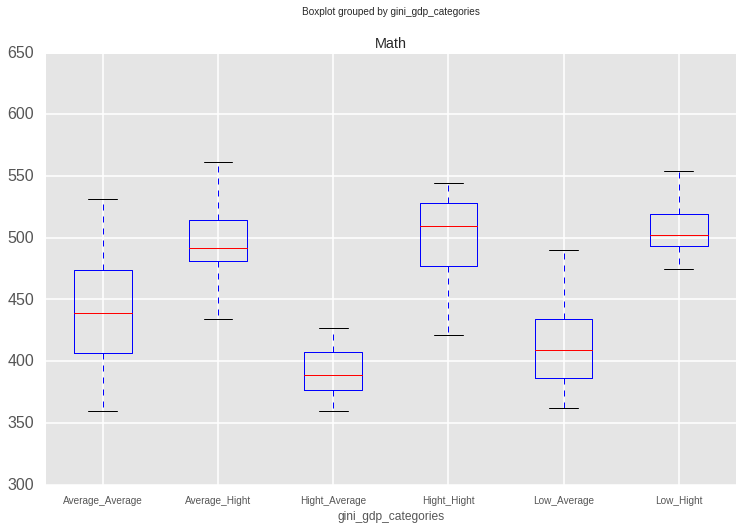

In [111]:
df5.boxplot('Math', by='gini_gdp_categories', figsize=(12,8))

In [112]:
mod = ols('Math ~ gini_gdp_categories', data=df5).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                            sum_sq   df          F        PR(>F)
gini_gdp_categories  285738.739743    5  34.202826  8.396469e-25
Residual             315790.408975  189        NaN           NaN
0.475020604324


In [68]:
'''
H0 - hypitize that GDP index is not correlated with results in PISA test
Can't check cause very few data with low GDP
'''
'''
print "*******************GINI ANOVA**********************************"
low_gdp = df4.loc[df4['gdp_categories'] == 'Low'].Math
shapiro_results = scipy.stats.shapiro(low_gdp)
print "*** Low GDP check normal***"
print shapiro_results

#print low_gini
av_gdp =  df4.loc[df4['gdp_categories'] == 'Average'].Math
shapiro_results = scipy.stats.shapiro(av_gdp)
print "*** AVERAGE GDP check normal ***"
print shapiro_results


hi_gdp =  df4.loc[df4['gdp_categories'] == 'Hight'].Math
shapiro_results = scipy.stats.shapiro(hi_gdp)
print "*** HIGHT GDP check normal ***"
print shapiro_results

f_val, p_val = stats.f_oneway(low_gdp, av_gdp, hi_gdp)

print "One-way ANOVA F =", f_val
print "One-way ANOVA P =", p_val 

print "*************************************************************"
'''
 

'\nprint "*******************GINI ANOVA**********************************"\nlow_gdp = df4.loc[df4[\'gdp_categories\'] == \'Low\'].Math\nshapiro_results = scipy.stats.shapiro(low_gdp)\nprint "*** Low GDP check normal***"\nprint shapiro_results\n\n#print low_gini\nav_gdp =  df4.loc[df4[\'gdp_categories\'] == \'Average\'].Math\nshapiro_results = scipy.stats.shapiro(av_gdp)\nprint "*** AVERAGE GDP check normal ***"\nprint shapiro_results\n\n\nhi_gdp =  df4.loc[df4[\'gdp_categories\'] == \'Hight\'].Math\nshapiro_results = scipy.stats.shapiro(hi_gdp)\nprint "*** HIGHT GDP check normal ***"\nprint shapiro_results\n\nf_val, p_val = stats.f_oneway(low_gdp, av_gdp, hi_gdp)\n\nprint "One-way ANOVA F =", f_val\nprint "One-way ANOVA P =", p_val \n\nprint "*************************************************************"\n'